## 1. Credit card applications prediction
<p>We'll use the <a href="http://archive.ics.uci.edu/ml/datasets/credit+approval">Credit Card Approval dataset</a> from the UCI Machine Learning Repository. The structure of this notebook is as follows:</p>
<ul>
<li>First, we will start off by loading and viewing the dataset.</li>
<li>We will see that the dataset has a mixture of both numerical and non-numerical features, that it contains values from different ranges, plus that it contains a number of missing entries.</li>
<li>We will have to preprocess the dataset to ensure the machine learning model we choose can make good predictions.</li>
<li>After our data is in good shape, we will do some exploratory data analysis to build our intuitions.</li>
<li>Finally, we will build a machine learning model that can predict if an individual's application for a credit card will be accepted.</li>
</ul>
<p>First, loading and viewing the dataset. We find that since this data is confidential, the contributor of the dataset has anonymized the feature names.</p>

In [62]:

import pandas as pd
cc_apps = pd.read_csv('datasets/cc_approvals.data',header=None)

print(cc_apps.head())

  0      1      2  3  4  5  6     7  8  9   10 11 12     13   14 15
0  b  30.83  0.000  u  g  w  v  1.25  t  t   1  f  g  00202    0  +
1  a  58.67  4.460  u  g  q  h  3.04  t  t   6  f  g  00043  560  +
2  a  24.50  0.500  u  g  q  h  1.50  t  f   0  f  g  00280  824  +
3  b  27.83  1.540  u  g  w  v  3.75  t  t   5  t  g  00100    3  +
4  b  20.17  5.625  u  g  w  v  1.71  t  f   0  f  s  00120    0  +


## 2. Inspecting the dataset
<p>The output may appear a bit confusing at its first sight, but let's try to figure out the most important features of a credit card application. The features of this dataset have been anonymized to protect the privacy, but <a href="http://rstudio-pubs-static.s3.amazonaws.com/73039_9946de135c0a49daa7a0a9eda4a67a72.html">this blog</a> gives  a pretty good overview of the probable features. The probable features in a typical credit card application are <code>Gender</code>, <code>Age</code>, <code>Debt</code>, <code>Married</code>, <code>BankCustomer</code>, <code>EducationLevel</code>, <code>Ethnicity</code>, <code>YearsEmployed</code>, <code>PriorDefault</code>, <code>Employed</code>, <code>CreditScore</code>, <code>DriversLicense</code>, <code>Citizen</code>, <code>ZipCode</code>, <code>Income</code> and finally the <code>ApprovalStatus</code>. This gives a pretty good starting point, and we can map these features with respect to the columns in the output.   </p>
<p>The dataset has a mixture of numerical and non-numerical features. This can be fixed with some preprocessing, but before we do that, let's learn about the dataset a bit more to see if there are other dataset issues that need to be fixed.</p>

In [63]:
# Printing summary statistics
cc_apps_description = cc_apps.describe()
print(cc_apps_description)

print("\n")

# Printing DataFrame information
cc_apps_info = cc_apps.info()
print(cc_apps_info)

print("\n")
print(cc_apps.tail(17))


               2           7          10             14
count  690.000000  690.000000  690.00000     690.000000
mean     4.758725    2.223406    2.40000    1017.385507
std      4.978163    3.346513    4.86294    5210.102598
min      0.000000    0.000000    0.00000       0.000000
25%      1.000000    0.165000    0.00000       0.000000
50%      2.750000    1.000000    0.00000       5.000000
75%      7.207500    2.625000    3.00000     395.500000
max     28.000000   28.500000   67.00000  100000.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       690 non-null    object 
 1   1       690 non-null    object 
 2   2       690 non-null    float64
 3   3       690 non-null    object 
 4   4       690 non-null    object 
 5   5       690 non-null    object 
 6   6       690 non-null    object 
 7   7       690 non-null    float64
 8   8       690 no

## 3. Handling the missing values (part 1)
<p>We've uncovered some issues that will affect the performance of our machine learning model(s) if they go unchanged:</p>
<ul>
<li>Our dataset contains both numeric and non-numeric data (specifically data that are of <code>float64</code>, <code>int64</code> and <code>object</code> types). Specifically, the features 2, 7, 10 and 14 contain numeric values (of types float64, float64, int64 and int64 respectively) and all the other features contain non-numeric values.</li>
<li>The dataset also contains values from several ranges. </li>
<li>Finally, the dataset has missing values, which we'll take care of. The missing values in the dataset are labeled with '?', which can be seen in the last cell's output.</li>
</ul>
<p>Now, let's temporarily replace these missing value question marks with NaN.</p>

In [64]:

import numpy as np
# Inspecting missing values in the dataset
print(cc_apps.tail(20),end='\n\n')

# Replacing the '?'s with NaN
cc_apps = cc_apps.replace('?',np.nan)
print("Numbers of missing values in every column: \n",cc_apps.isna().sum())
print(cc_apps.tail(20))
# Inspecting the missing values again


    0      1       2  3  4   5   6      7  8  9   10 11 12     13   14 15
670  b  47.17   5.835  u  g   w   v  5.500  f  f   0  f  g  00465  150  -
671  b  25.83  12.835  u  g  cc   v  0.500  f  f   0  f  g  00000    2  -
672  a  50.25   0.835  u  g  aa   v  0.500  f  f   0  t  g  00240  117  -
673  ?  29.50   2.000  y  p   e   h  2.000  f  f   0  f  g  00256   17  -
674  a  37.33   2.500  u  g   i   h  0.210  f  f   0  f  g  00260  246  -
675  a  41.58   1.040  u  g  aa   v  0.665  f  f   0  f  g  00240  237  -
676  a  30.58  10.665  u  g   q   h  0.085  f  t  12  t  g  00129    3  -
677  b  19.42   7.250  u  g   m   v  0.040  f  t   1  f  g  00100    1  -
678  a  17.92  10.210  u  g  ff  ff  0.000  f  f   0  f  g  00000   50  -
679  a  20.08   1.250  u  g   c   v  0.000  f  f   0  f  g  00000    0  -
680  b  19.50   0.290  u  g   k   v  0.290  f  f   0  f  g  00280  364  -
681  b  27.83   1.000  y  p   d   h  3.000  f  f   0  f  g  00176  537  -
682  b  17.08   3.290  u  g   i   v  0

## 4. Handling the missing values (part 2)
<p>We replaced all the question marks with NaNs. This is going to help us in the next missing value treatment that we are going to perform.</p>
<p>To avoid problems with missing values, we are going to impute the missing values with a strategy called mean imputation.</p>

In [65]:
# Imputing the missing values with mean imputation
cc_apps.fillna(cc_apps[[2,7,10,14]].mean(), inplace=True)
print(cc_apps.isna().sum())

0     12
1     12
2      0
3      6
4      6
5      9
6      9
7      0
8      0
9      0
10     0
11     0
12     0
13    13
14     0
15     0
dtype: int64


## 5. Handling the missing values (part 3)
<p>We have successfully taken care of the missing values present in the numeric columns. There are still some missing values to be imputed for columns 0, 1, 3, 4, 5, 6 and 13. All of these columns contain non-numeric data and this why the mean imputation strategy would not work here. This needs a different treatment. </p>
<p>We are going to impute these missing values with the most frequent values as present in the respective columns.</p>

In [66]:
# Iterating over each column of cc_apps
for col in cc_apps.columns:
    # Checking if the column is of object type
    if cc_apps[col].dtype == 'object':
        # Imputing with the most frequent value
        cc_apps = cc_apps.fillna(cc_apps[col].value_counts().index[0])


# Counting the number of NaNs in the dataset and print the counts to verify
print(cc_apps.isnull().values.sum())

0


## 6. Preprocessing the data (part 1)
<p>The missing values are now successfully handled.</p>
<p>There is still some minor but essential data preprocessing needed before we proceed towards building our machine learning model. We are going to divide these remaining preprocessing steps into three main tasks:</p>
<ol>
<li>Convert the non-numeric data into numeric.</li>
<li>Split the data into train and test sets. </li>
<li>Scale the feature values to a uniform range.</li>
</ol>


In [67]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Iterating over all the values of each column and extract their dtypes
for col in cc_apps.columns:
    # Compare if the dtype is object
    if cc_apps[col].dtype=='object':
    # Using LabelEncoder to do the numeric transformation
        cc_apps[col]=le.fit_transform(cc_apps[col])
print(cc_apps.head())
print(cc_apps.dtypes)

   0    1      2   3   4   5   6     7   8   9   10  11  12  13   14  15
0   1  156  0.000   2   1  13   8  1.25   1   1   1   0   0  68    0   0
1   0  328  4.460   2   1  11   4  3.04   1   1   6   0   0  11  560   0
2   0   89  0.500   2   1  11   4  1.50   1   0   0   0   0  96  824   0
3   1  125  1.540   2   1  13   8  3.75   1   1   5   1   0  31    3   0
4   1   43  5.625   2   1  13   8  1.71   1   0   0   0   2  37    0   0
0       int64
1       int64
2     float64
3       int64
4       int64
5       int64
6       int64
7     float64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
dtype: object


## 7. Splitting the dataset into train and test sets
<p>We have successfully converted all the non-numeric values to numeric ones.</p>
<p>Now, we will split our data into train set and test set to prepare our data for two different phases of machine learning modeling: training and testing.</p>
<p>Also, features like <code>DriversLicense</code> and <code>ZipCode</code> are not as important as the other features in the dataset for predicting credit card approvals. We should drop them to design our machine learning model with the best set of features.</p>

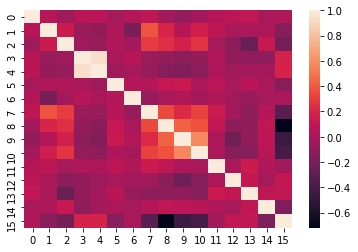

In [68]:
import seaborn as sns
corre = cc_apps.corr()
sns.heatmap(corre)

In [69]:
from sklearn.model_selection import train_test_split
# Dropping the features 11 and 13 and converting the DataFrame to a NumPy array

cc_apps = cc_apps.drop([11, 13], axis=1)
cc_apps = cc_apps.values

# Segregating features and labels into separate variables
X,y = cc_apps[:,0:13] , cc_apps[:,13]
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,
                                y,
                                test_size=0.33,
                                random_state=42)

## 8. Preprocessing the data (part 2)
<p>The data is now split into two separate sets - train and test sets respectively. We are only left with one final preprocessing step of scaling before we can fit a machine learning model to the data. </p>
<p>Now, let's try to understand what these scaled values mean in the real world. Let's use <code>CreditScore</code> as an example. The credit score of a person is their creditworthiness based on their credit history. The higher this number, the more financially trustworthy a person is considered to be. So, a <code>CreditScore</code> of 1 is the highest since we're rescaling all the values to the range of 0-1.</p>

In [70]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX_train = scaler.fit_transform(X_train)
rescaledX_test = scaler.transform(X_test)

## 9. Fitting a logistic regression model to the train set
<p>Predicting if a credit card application will be approved or not is a classification task. <a href="http://archive.ics.uci.edu/ml/machine-learning-databases/credit-screening/crx.names">According to UCI</a>, our dataset contains more instances that correspond to "Denied" status than instances corresponding to "Approved" status. Specifically, out of 690 instances, there are 383 (55.5%) applications that got denied and 307 (44.5%) applications that got approved. </p>
<p>This gives us a benchmark. A good machine learning model should be able to accurately predict the status of the applications with respect to these statistics.</p>
<p>Which model should we pick? A question to ask is: <em>are the features that affect the credit card approval decision process correlated with each other? As we could see above, most of the are correlated with each other. So we will try to use all of them in Logistic Regression</p>

In [71]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(rescaledX_train,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## 10. Making predictions and evaluating performance
<p>But how well does our model perform? </p>
<p>We will now evaluate our model on the test set with respect to classification accuracy. But we will also take a look the model's confusion matrix. In the case of predicting credit card applications, it is equally important to see if our machine learning model is able to predict the approval status of the applications as denied that originally got denied. If our model is not performing well in this aspect, then it might end up approving the application that should have been approved. The confusion matrix helps us to view our model's performance from these aspects.  </p>

In [72]:
from sklearn.metrics import confusion_matrix

y_pred = logreg.predict(rescaledX_test)

print("Accuracy of logistic regression classifier: ", logreg.score(rescaledX_test,y_test))

print(confusion_matrix(y_test,y_pred))


Accuracy of logistic regression classifier:  0.8421052631578947
[[94  9]
 [27 98]]


## 11. Grid searching and making the model perform better
<p>Our model was pretty good! It was able to yield an accuracy score of above 84%.</p>
<p>For the confusion matrix, the first element of the first row of the confusion matrix denotes the true negatives meaning the number of negative instances (denied applications) predicted by the model correctly. And the last element of the second row of the confusion matrix denotes the true positives meaning the number of positive instances (approved applications) predicted by the model correctly.</p>
<p>Let's see if we can do better. We can perform a grid search of the model parameters to improve the model's ability to predict credit card approvals.

In [73]:
from sklearn.model_selection import GridSearchCV
# Defining the grid of values for tol and max_iter
tol = [0.01,0.001,0.0001]
max_iter = [100,150,200]

# Creating a dictionary where tol and max_iter are keys and the lists of their values are corresponding values
param_grid = dict(tol=tol,max_iter=max_iter)

## 12. Finding the best performing model
<p>We have defined the grid of hyperparameter values and converted them into a single dictionary format which <code>GridSearchCV()</code> expects as one of its parameters. Now, we will begin the grid search to see which values perform best.</p>
<p>We will instantiate <code>GridSearchCV()</code> with our earlier <code>logreg</code> model with all the data we have. Instead of passing train and test sets separately, we will supply <code>X</code> (scaled version) and <code>y</code>. We will also instruct <code>GridSearchCV()</code> to perform a cross-validation of five folds.</p>

In [74]:
# Instantiating GridSearchCV with the required parameters
grid_model = GridSearchCV(estimator=logreg, param_grid=param_grid, cv=5)

# Using scaler to rescale X and assign it to rescaledX
rescaledX = scaler.fit_transform(X)

grid_model_result = grid_model.fit(rescaledX, y)
# Summarize results
best_score, best_params = grid_model_result.best_score_,grid_model_result.best_params_
print("Best: %f using %s" % (best_score, best_params))

Best: 0.850725 using {'max_iter': 100, 'tol': 0.01}


## 13. Checking performance of Trees algorithms with Decision Tree and Random Forest


In [75]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_absolute_error

for depth in [5,10,15,20,25,30]:
  tree = DecisionTreeClassifier(max_depth=depth,max_features='log2',random_state=42)
  tree.fit(X_train,y_train)
  y_pred = tree.predict(X_test)
  print(f'Result of Decision Tree Classifier with {depth} depth: {tree.score(X_test,y_test)}')

for depth in [5,10,15,20,25,30]:
  forest = RandomForestClassifier(n_estimators=50,max_depth=depth,max_features='log2',n_jobs=4,random_state=4)
  forest.fit(X_train,y_train)
  y_pred=tree.predict(X_test)
  print(f'Result of Random Forest Classifier with {depth} depth: {forest.score(X_test,y_test)}')
  

Result of Decision Tree Classifier with 5 depth: 0.7894736842105263
Result of Decision Tree Classifier with 10 depth: 0.8289473684210527
Result of Decision Tree Classifier with 15 depth: 0.8114035087719298
Result of Decision Tree Classifier with 20 depth: 0.8114035087719298
Result of Decision Tree Classifier with 25 depth: 0.8114035087719298
Result of Decision Tree Classifier with 30 depth: 0.8114035087719298
Result of Random Forest Classifier with 5 depth: 0.868421052631579
Result of Random Forest Classifier with 10 depth: 0.8728070175438597
Result of Random Forest Classifier with 15 depth: 0.8728070175438597
Result of Random Forest Classifier with 20 depth: 0.8728070175438597
Result of Random Forest Classifier with 25 depth: 0.8728070175438597
Result of Random Forest Classifier with 30 depth: 0.8728070175438597


##14. Final thoughts

<p>As we can see, Tree algorithms performed very well, that the best in Decision Tree Classifier was accuracy of 82% and in Random Forest Classifier, we've got 87% acuracy. There is still more to check, like changing more parameters or using cross_val_score</p>
